In [1]:
import numpy as np
from matplotlib import pyplot as plt
import networkx as nx
from graph_from_skeleton.graph_from_skeleton import *
from graph_from_skeleton.utils import *
from skimage.morphology import skeletonize_3d as sk3d
%matplotlib inline

path_apls: /cvlabdata2/home/oner/CarlsData/SegmentingBrains


In [2]:
def plot_graph_3d(graph, node_size=2.2, font_size=-1, 
               node_color='r', edge_color='r', 
               linewidths=2, offset=np.array([0,0]), **kwargs):
  
    pos = dict({n:graph.nodes[n]['pos'][:2]+offset for n in graph.nodes()})
    nx.draw_networkx(graph, pos=pos, node_size=node_size, node_color=node_color,
                     edge_color=edge_color, font_size=font_size, **kwargs)
#     plt.gca().invert_yaxis()

In [4]:
pred_graph = load_graph_txt("./demo_graph.txt")

In [9]:
## Adding edge lengths to edge data
for n1, n2, d in pred_graph.edges(data=True):
    pos1 = np.array(pred_graph.nodes[n1]["pos"])
    pos2 = np.array(pred_graph.nodes[n2]["pos"])
    
    d["length"] = np.linalg.norm(pos1-pos2)

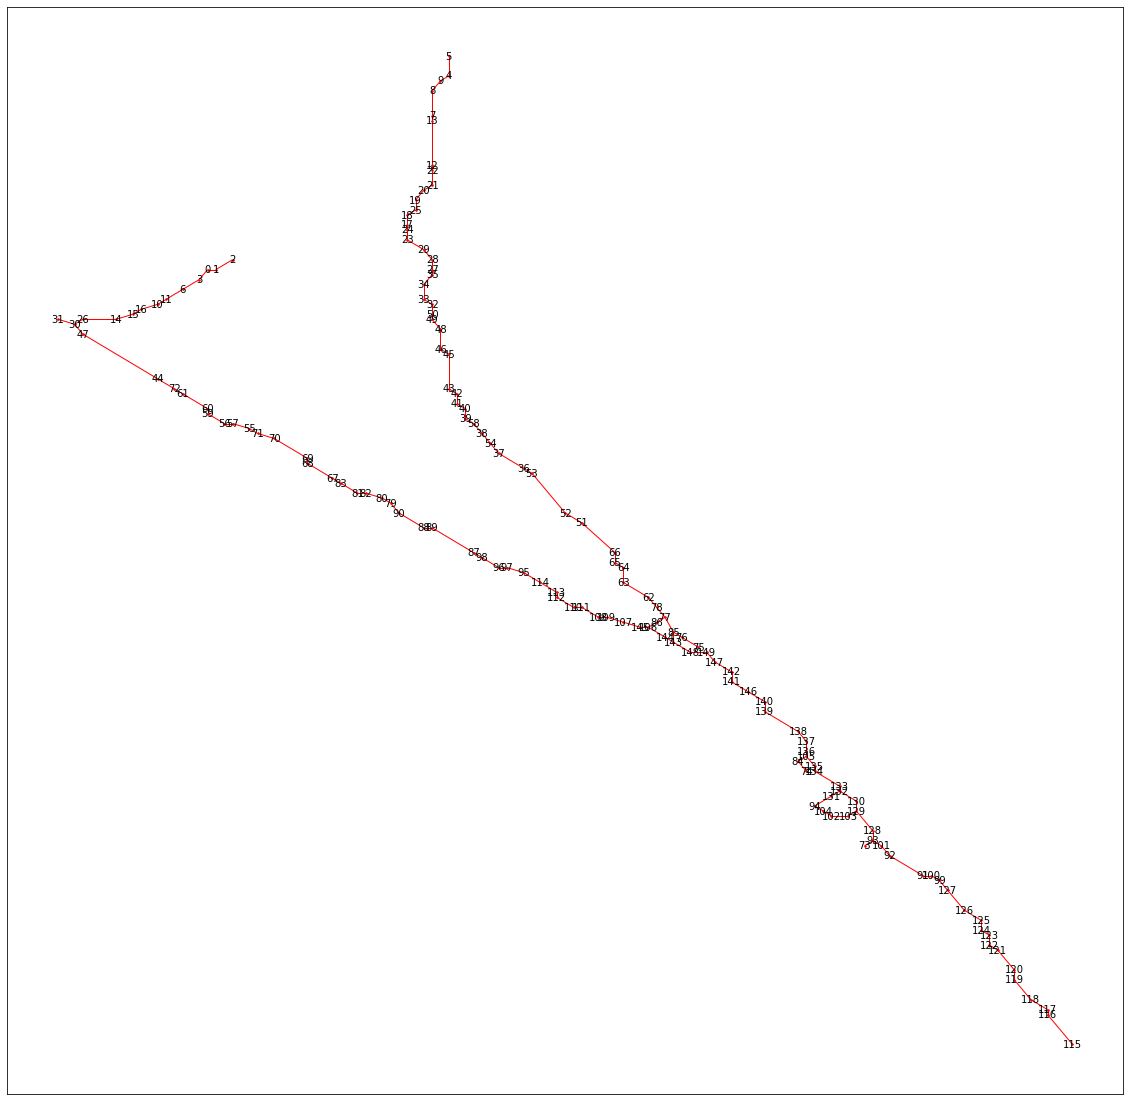

In [15]:
%matplotlib inline
plt.figure(figsize=(20,20))
plot_graph_3d(pred_graph, font_size=10)

In [11]:
## Finding neighbors of each node
neighbors = {}
for n in pred_graph.nodes:
    neighbors[n] = list(pred_graph.neighbors(n))

In [12]:
cards = []
for k,v in neighbors.items():
    cards.append(len(v))

(array([  7.,   0.,   0.,   0.,   0., 134.,   0.,   0.,   0.,   9.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <BarContainer object of 10 artists>)

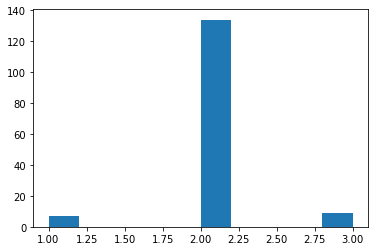

In [13]:
plt.hist(cards)

In [237]:
import pickle 
with open('demo_neighbors.pkl', 'wb') as f:
    pickle.dump(neighbors, f)